## Practical Lab 10 - Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

2024-03-27 11:22:11.033728: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("./data/train")

# Snippet to split the train directory data into sub folders
# new_base_dir = pathlib.Path("./data/kaggle_dogs_vs_cats_small")

# def make_subset(subset_name, start_index, end_index):
#     for category in ("cat", "dog"):
#         dir = new_base_dir / subset_name / category
#         os.makedirs(dir)
#         fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#         for fname in fnames:
#             shutil.copyfile(src=original_dir / fname,
#                             dst=dir / fname)

# make_subset("train", start_index=0, end_index=1000)
# make_subset("validation", start_index=1000, end_index=1500)
# make_subset("test", start_index=1500, end_index=2500)

Total number of images: 2000
Number of cat images: 1000
Number of dog images: 1000


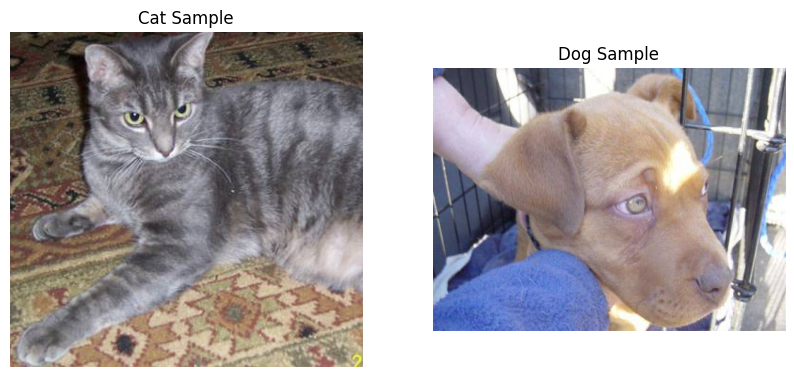

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing subfolders for cats and dogs
data_dir = "./data/kaggle_dogs_vs_cats_small/train"

# Count the number of images in each class
num_cats = len(os.listdir(os.path.join(data_dir, "cat")))
num_dogs = len(os.listdir(os.path.join(data_dir, "dog")))

# Basic statistics
print("Total number of images:", num_cats + num_dogs)
print("Number of cat images:", num_cats)
print("Number of dog images:", num_dogs)

# Sample images
cat_sample = Image.open(os.path.join(data_dir, "cat", os.listdir(os.path.join(data_dir, "cat"))[0]))
dog_sample = Image.open(os.path.join(data_dir, "dog", os.listdir(os.path.join(data_dir, "dog"))[0]))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cat_sample)
plt.title("Cat Sample")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_sample)
plt.title("Dog Sample")
plt.axis('off')

plt.show()


### TRAINNIG TWO NEURALNTEWORKS

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt


### Define a cstome model

In [5]:
def custom_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define input shape (adjust according to your image dimensions)
input_shape = (150, 150, 3)

# Create the model
model_custom = custom_model(input_shape)
model_custom.summary()

# Compile the model
model_custom.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks to save the best model
checkpoint_custom = ModelCheckpoint("./models/best_model_custom.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './data/kaggle_dogs_vs_cats_small/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    './data/kaggle_dogs_vs_cats_small/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Train the model
history_custom = model_custom.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[checkpoint_custom]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2024-03-26 00:35:16.013110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/20
63/62 [==============================] - ETA: -4s - loss: 0.7052 - accuracy: 0.5165

2024-03-26 00:44:24.672637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.57900, saving model to ./models/best_model_custom.h5
62/62 [==============================] - 633s 10s/step - loss: 0.7052 - accuracy: 0.5165 - val_loss: 0.6884 - val_accuracy: 0.5790
Epoch 2/20
63/62 [==============================] - ETA: -4s - loss: 0.6785 - accuracy: 0.6050
Epoch 2: val_accuracy did not improve from 0.57900
62/62 [==============================] - 735s 12s/step - loss: 0.6785 - accuracy: 0.6050 - val_loss: 0.6723 - val_accuracy: 0.5420
Epoch 3/20
63/62 [==============================] - ETA: -4s - loss: 0.6371 - accuracy: 0.6450
Epoch 3: val_accuracy improved from 0.57900 to 0.66200, saving model to ./models/best_model_custom.h5
62/62 [==============================] - 592s 9s/step - loss: 0.6371 - accuracy: 0.6450 - val_loss: 0.6214 - val_accuracy: 0.6620
Epoch 4/20
63/62 [==============================] - ETA: -3s - loss: 0.5936 - accuracy: 0.6775
Epoch 4: val_accuracy improved from 0.66200 to 0.68300, saving model t

### Fine-tuning VGG16

In [6]:
def fine_tune_vgg16(input_shape):
    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classifier on top
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    # Compile the model
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the fine-tuned model
model_vgg16 = fine_tune_vgg16(input_shape)
model_vgg16.summary()

# Set up callbacks to save the best model
checkpoint_vgg16 = ModelCheckpoint("./models/best_model_vgg16.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[checkpoint_vgg16]
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

2024-03-26 03:44:45.488315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-26 03:44:53.829408: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.
2024-03-26 03:44:54.750679: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


 1/62 [..............................] - ETA: 41:42 - loss: 0.8995 - accuracy: 0.2812

2024-03-26 03:45:26.290917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.
2024-03-26 03:45:27.542710: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


 2/62 [..............................] - ETA: 29:58 - loss: 1.7093 - accuracy: 0.3594

2024-03-26 03:45:56.035684: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


63/62 [==============================] - ETA: -15s - loss: 0.5012 - accuracy: 0.7775

2024-03-26 04:16:29.401410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.88200, saving model to ./models/best_model_vgg16.h5
62/62 [==============================] - 2891s 46s/step - loss: 0.5012 - accuracy: 0.7775 - val_loss: 0.2872 - val_accuracy: 0.8820
Epoch 2/20
63/62 [==============================] - ETA: -15s - loss: 0.2687 - accuracy: 0.8880
Epoch 2: val_accuracy improved from 0.88200 to 0.89500, saving model to ./models/best_model_vgg16.h5
62/62 [==============================] - 2900s 47s/step - loss: 0.2687 - accuracy: 0.8880 - val_loss: 0.2538 - val_accuracy: 0.8950
Epoch 3/20
63/62 [==============================] - ETA: -15s - loss: 0.2240 - accuracy: 0.9070
Epoch 3: val_accuracy did not improve from 0.89500
62/62 [==============================] - 2906s 47s/step - loss: 0.2240 - accuracy: 0.9070 - val_loss: 0.3075 - val_accuracy: 0.8630
Epoch 4/20
63/62 [==============================] - ETA: -15s - loss: 0.1757 - accuracy: 0.9380
Epoch 4: val_accuracy did not improve from 0.89500
62/62 [=======

## Ploting the Loss and Accuracy of the model

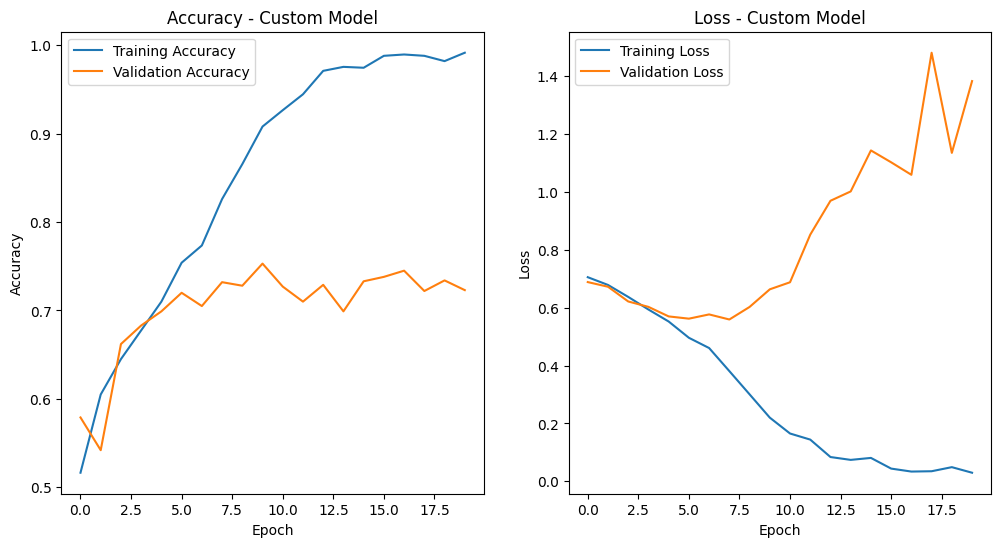

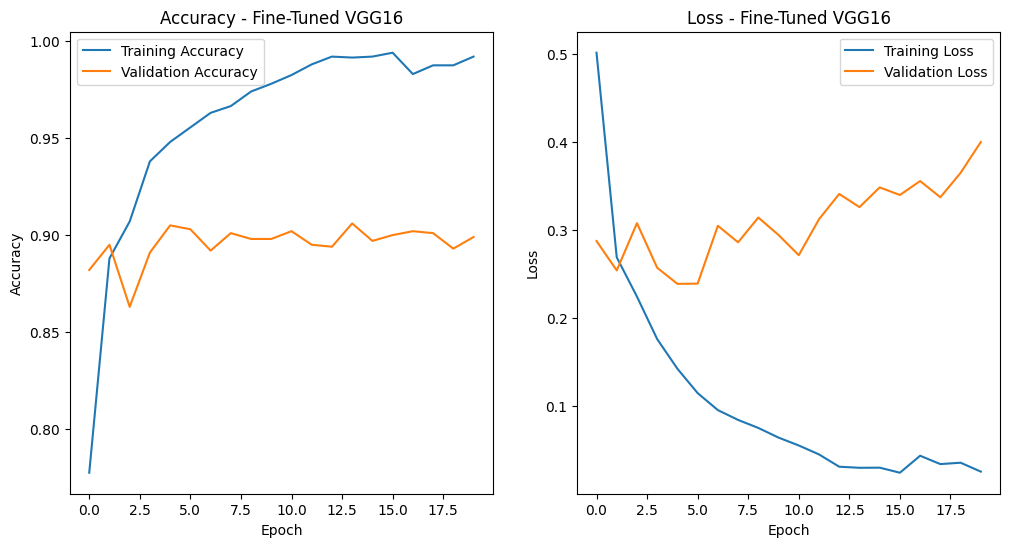

In [7]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy - ' + title)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss - ' + title)
    plt.legend()

    plt.show()

# Plot custom model history
plot_history(history_custom, "Custom Model")

# Plot fine-tuned VGG16 model history
plot_history(history_vgg16, "Fine-Tuned VGG16")


### Relative performance of the models (Accuracy, Confusion Metric, Precision, Recall, F1, Precision-Recall Curve)

Found 2000 images belonging to 2 classes.


2024-03-26 23:39:33.840811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 123s 2s/step - loss: 0.7243 - accuracy: 0.7300
Custom Model Performance:
Accuracy: 0.7300000190734863


2024-03-26 23:41:57.393470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 122s 2s/step
Confusion Matrix:
[[1000    0]
 [1000    0]]
Classification Report:
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67      1000
         dog       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

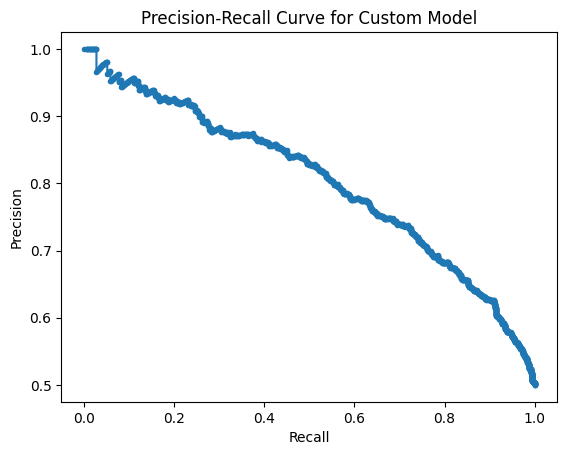

2024-03-26 23:44:23.105683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 1674s 27s/step - loss: 0.3665 - accuracy: 0.8910
Fine-Tuned VGG16 Model Performance:
Accuracy: 0.890999972820282


2024-03-27 00:12:47.047563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 1517s 24s/step
Confusion Matrix:
[[1000    0]
 [1000    0]]
Classification Report:
              precision    recall  f1-score   support

         cat       0.50      1.00      0.67      1000
         dog       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noa/conestoga/cscn8010/CSCN8010/venv/tensorflow_cpu/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

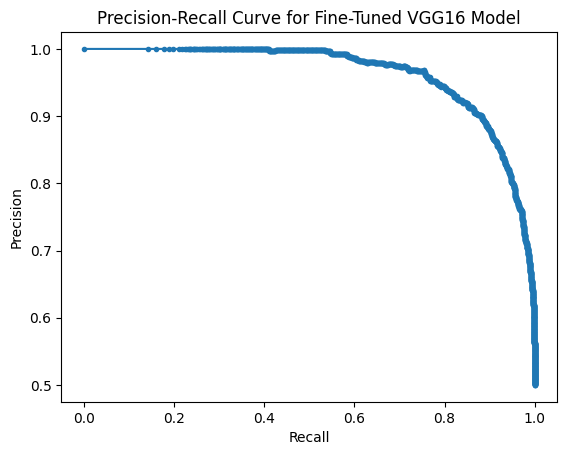

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the best version of each model
best_custom_model = load_model("./models/best_model_custom.h5")
best_vgg16_model = load_model("./models/best_model_vgg16.h5")

# Load test data for evaluation
test_generator = test_datagen.flow_from_directory(
    './data/kaggle_dogs_vs_cats_small/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Evaluate custom model
custom_model_scores = best_custom_model.evaluate(test_generator)
print("Custom Model Performance:")
print("Accuracy:", custom_model_scores[1])

# Predictions for custom model
custom_model_predictions = best_custom_model.predict(test_generator)
custom_model_pred_classes = np.argmax(custom_model_predictions, axis=1)

# Confusion matrix for custom model
custom_model_cm = confusion_matrix(test_generator.classes, custom_model_pred_classes)
print("Confusion Matrix:")
print(custom_model_cm)

# Classification report for custom model
custom_model_classification_report = classification_report(test_generator.classes, custom_model_pred_classes, target_names=test_generator.class_indices)
print("Classification Report:")
print(custom_model_classification_report)

# Precision-recall curve for custom model
precision, recall, _ = precision_recall_curve(test_generator.classes, custom_model_predictions)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Custom Model')
plt.show()

# Evaluate fine-tuned VGG16 model
vgg16_model_scores = best_vgg16_model.evaluate(test_generator)
print("Fine-Tuned VGG16 Model Performance:")
print("Accuracy:", vgg16_model_scores[1])

# Predictions for VGG16 model
vgg16_model_predictions = best_vgg16_model.predict(test_generator)
vgg16_model_pred_classes = np.argmax(vgg16_model_predictions, axis=1)

# Confusion matrix for VGG16 model
vgg16_model_cm = confusion_matrix(test_generator.classes, vgg16_model_pred_classes)
print("Confusion Matrix:")
print(vgg16_model_cm)

# Classification report for VGG16 model
vgg16_model_classification_report = classification_report(test_generator.classes, vgg16_model_pred_classes, target_names=test_generator.class_indices)
print("Classification Report:")
print(vgg16_model_classification_report)

# Precision-recall curve for VGG16 model
precision, recall, _ = precision_recall_curve(test_generator.classes, vgg16_model_predictions)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Fine-Tuned VGG16 Model')
plt.show()

